In [6]:
import math
import numpy as np
import autograd.numpy as anp
from autograd import jacobian
import matplotlib.pyplot as plt
from scipy import linalg as la
%matplotlib inline

In [16]:
""" Problem 1, 3 """

def newton(f, fprime, x0, niter = 15, tol = 1e-5, alpha = 1):
    x1 = x0 + 1
    iternum = 0
    boolConverged = False
    while iternum < niter and boolConverged == False:
        x1 = x0 - alpha* f(x0)/fprime(x0)
        iternum += 1
        if abs(x1- x0) < tol:
            boolConverged = True 
        x0 = x1
    return x1, boolConverged, iternum

#test for problem 1
f = lambda x: math.exp(x) - 2
fprime = lambda x: math.exp(x)
print(newton(f, fprime, 0.5))

#test for problem 3
f = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
fprime = lambda x: 1/3 * np.power(np.abs(x), -2./3)
print(newton(f, fprime, 0.5, alpha = 0.4))

(0.6931471805599496, True, 5)
(-7.6800000000001789e-07, True, 9)


In [13]:
""" Problem 2 """

def prob2(N1, N2, P1, P2):

    f = lambda r: P1 * ((1 + r) ** N1 - 1) - P2 * (1 - (1 + r) ** (-N2))
    fprime = lambda r: P1 * N1 * (1 + r) ** (N1 - 1) - P2 * N2 *(1 + r) ** (-N2 - 1)
    return newton(f, fprime, 0.5, niter = 100)

prob2(30, 20, 2000, 8000)

(0.03877843202968288, True, 31)

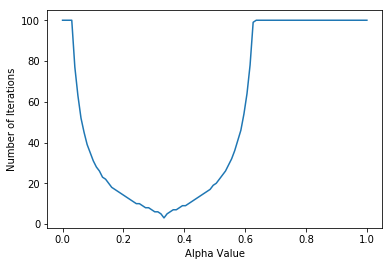

0.33334000000000003

In [30]:
""" Problem 4 """

def prob4():
    f = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
    fprime = lambda x: 1/3 * np.power(np.abs(x), -2./3)
    alpha  = np.linspace(1e-5, 1, 100)
    iterations = np.zeros_like(alpha)
    for i in range(len(alpha)):
        iterations[i] = newton(f, fprime, 0.5, niter = 100, alpha = alpha[i])[2]
    
    #plot graph
    plt.plot(alpha, iterations)
    plt.xlabel("Alpha Value")
    plt.ylabel("Number of Iterations")
    plt.show()
    
    #get min alpha
    minalpha = alpha[np.where(iterations == min(iterations))][0]
    return minalpha
    
prob4()

In [15]:
""" Problem 5 """

def newtonND(f, Df, x0, niter=15, tol=1e-5, alpha=1):
    if np.isscalar(x0):
        return newton(f, Df, x0, niter = niter, tol = tol, alpha = alpha)
    else:
        iternum = 0
        boolConverged = False
        x1 = x + 1
        while iternum < niter and boolConverged == False:
            x1 = x0 - alpha* la.solve(Df(x0), f(x0))
            iternum += 1
            if la.norm(x1 - x0) < tol:
                boolConverged = True 
            x0 = x1
        return x1, boolConverged, iternum

In [ ]:
""" Problem 6 """

def prob6(f, Df, niter = 15, tol=1e-5):
    sol1 = np.array([0,1])
    sol2 = np.array([0,-1])
    sol3 = np.array([3.75,0.25])
    xvals = np.linspace(-1/4, 0, 100)
    yvals = np.linspace(0, 1/4, 100)
    aprox1 = newtonND(f, Df, x0, niter = niter, tol=tol, alpha=1)
    aprox3 = newtonND(f, Df, x0, niter = niter, tol=tol, alpha=0.55)
    return aprox1, aprox3

gamma = 5 
delta = 1
f = lambda x: anp.array([gamma* x[0] * x[1] - x[0] * (1 + x[1]), - x[0] * x[1] + (delta - x[1]) * (1 + x[1])])
Df = jacobian(f)
prob6(f, Df, niter = 15, tol=1e-5)

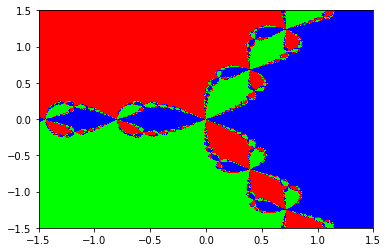

In [38]:
""" Problem 7 """

def basins(f, Df, roots, bounds, res = 100, iters = 100):
    x_real = np.linspace(bounds[0],bounds[1], res)    # Real parts.
    x_imag = np.linspace(bounds[2],bounds[3], res)    # Imaginary parts.
    X_real, X_imag = np.meshgrid(x_real, x_imag)
    X_0 = X_real + 1j*X_imag  
    for i in range(iters):
        X_1 = X_0 - f(X_0)/Df(X_0)
        X_0 = X_1
    Y = np.zeros((res,res))
    for i in range(res):
        for j in range(res):
            Y[i,j] = np.argmin(np.abs(roots - X_1[i,j]))
    plt.pcolormesh(x_real, x_imag, Y, cmap='brg')
    plt.show()
    
f = lambda x: x**3 - 1
Df = lambda x: 3* x**2
res = 100
iters = 100
roots = np.array([1, -0.5 + 1j / 2 * np.sqrt(3), -1/2 - 1j / 2 * np.sqrt(3)])
bounds = np.array([-1.5, 1.5, -1.5, 1.5])
basins(f, Df, roots, bounds, res = 500, iters = 500)